# EasyOCR
- `pip install easyocr`
- https://velog.io/@mminjg/TesseractOCR-EasyOCR-%EC%8B%A4%ED%96%89%EA%B3%BC-%ED%95%99%EC%8A%B5 

In [1]:
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image


In [10]:
reader = easyocr.Reader(['ko', 'en'])
# result = reader.readtext("./35692_69241.jpg")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


- Input Image
  
<img src="60209_59774_3558.jpg" width="340">

In [15]:
input_imfile = "./60209_59774_3558.jpg"
result = reader.readtext(input_imfile)

In [16]:
result[:2]

[([[13, 11], [180, 11], [180, 61], [13, 61]], '안녕하세요.', 0.9812373755500032),
 ([[194, 12], [558, 12], [558, 62], [194, 62]],
  '저논   세중시문해교육센터',
  0.47335209555805846)]

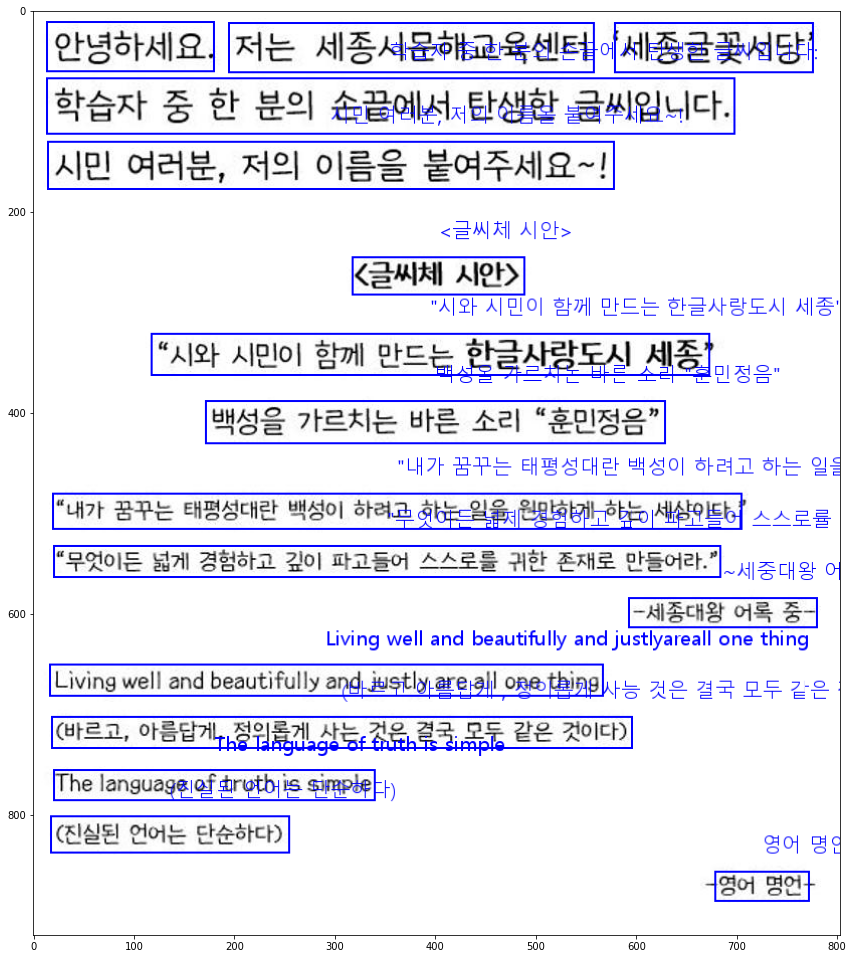

In [19]:
img = cv2.imread(input_imfile)
img = Image.fromarray(img) # convert to PIL
font = ImageFont.truetype("malgun.ttf", 20)
draw = ImageDraw.Draw(img)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]), font=font, fill="blue")
#
plt.figure(figsize=(17,17))
plt.imshow(img);